In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from scipy import stats

# Raw Data

In [2]:
raw_data = pd.read_csv('theoffice.csv')
data = raw_data[raw_data['deleted'] == False] # remove deleted scenes
len(data)
data.head()

,id,season,episode,scene,line_text,speaker,deleted
0,1,1,1,1,All right Jim. Your quarterlies look very good...,Michael,False
1,2,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim,False
2,3,1,1,1,So you've come to the master for guidance? Is ...,Michael,False
3,4,1,1,1,"Actually, you called me in here, but yeah.",Jim,False
4,5,1,1,1,"All right. Well, let me show you how it's done.",Michael,False


# Data cleaning

In [3]:
data['line_text'] = data['line_text'].str.replace("���", "'")
data.head()

/Users/tiffanychang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,season,episode,scene,line_text,speaker,deleted
0,1,1,1,1,All right Jim. Your quarterlies look very good...,Michael,False
1,2,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim,False
2,3,1,1,1,So you've come to the master for guidance? Is ...,Michael,False
3,4,1,1,1,"Actually, you called me in here, but yeah.",Jim,False
4,5,1,1,1,"All right. Well, let me show you how it's done.",Michael,False


In [4]:
data['speaker'].unique()
df = data.groupby(['speaker']).count()
df.sort_values(by=['line_text'], ascending=False, inplace=True)
michael, dwight, jim, pam, andy = [], [], [], [], []
unique_speakers = data['speaker'].unique()
for speaker in unique_speakers:
    speaker = speaker.lower()
    if "&" in speaker or "and " in speaker or "," in speaker or "'s" in speaker or "/" in speaker or "to" in speaker or "except" in speaker or "woman" in speaker:
        continue
    if "mic" in speaker.lower():
        michael.append(speaker)
    if "dwi" in speaker.lower():
        dwight.append(speaker)
    if "ji" in speaker.lower():
        jim.append(speaker)
    if "pam" in speaker.lower():
        pam.append(speaker)
    if "andy" in speaker.lower():
        if not "randy" in speaker and not "sandy" in speaker:
            andy.append(speaker)

In [5]:
print(michael, dwight, jim, pam, andy)

['michael', 'michel', 'young michael', 'michael ', 'michael', 'micheal', 'micahel', 'michae', 'micael', 'michael [on phone]', 'warehouse michael', 'michal', 'video michael'] ['dwight', 'dwight ', 'dwight:', 'dwightkschrute', 'dwight.', 'dwight [on phone]'] ['jim', 'jim', 'jim9334 [screen name]', 'jim9334', 'jim ', 'fake jim'] ['pam', 'pam [on phone]', 'pam ', 'pam as fourth-biggest client', 'pam as ninth-biggest client'] ['andy', '[repeats]\nandy: fail']


In [6]:
data.head()

,id,season,episode,scene,line_text,speaker,deleted
0,1,1,1,1,All right Jim. Your quarterlies look very good...,Michael,False
1,2,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim,False
2,3,1,1,1,So you've come to the master for guidance? Is ...,Michael,False
3,4,1,1,1,"Actually, you called me in here, but yeah.",Jim,False
4,5,1,1,1,"All right. Well, let me show you how it's done.",Michael,False


In [7]:
top_five = michael + dwight + jim + pam + andy
data['speaker'] = data['speaker'].str.lower()
top_five_data = data[data['speaker'].isin(top_five)]
top_five_data.head()

/Users/tiffanychang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,season,episode,scene,line_text,speaker,deleted
0,1,1,1,1,All right Jim. Your quarterlies look very good...,michael,False
1,2,1,1,1,"Oh, I told you. I couldn't close it. So...",jim,False
2,3,1,1,1,So you've come to the master for guidance? Is ...,michael,False
3,4,1,1,1,"Actually, you called me in here, but yeah.",jim,False
4,5,1,1,1,"All right. Well, let me show you how it's done.",michael,False


In [8]:
top_five_data.speaker = top_five_data.speaker.apply(lambda x: 'dwight' if 'dwi' in x else x) # clean up names
top_five_data.speaker = top_five_data.speaker.apply(lambda x: 'jim' if 'jim' in x else x)
top_five_data.speaker = top_five_data.speaker.apply(lambda x: 'pam' if 'pam' in x else x)
top_five_data.speaker = top_five_data.speaker.apply(lambda x: 'michael' if 'mic' in x else x)
top_five_data.speaker = top_five_data.speaker.apply(lambda x: 'andy' if 'andy' in x else x)

/Users/tiffanychang/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [9]:
top_five_data = top_five_data[['id', 'line_text','speaker']]
top_five_data.head()

,id,line_text,speaker
0,1,All right Jim. Your quarterlies look very good...,michael
1,2,"Oh, I told you. I couldn't close it. So...",jim
2,3,So you've come to the master for guidance? Is ...,michael
3,4,"Actually, you called me in here, but yeah.",jim
4,5,"All right. Well, let me show you how it's done.",michael


# Vocabulary

# Split users 

In [10]:
jim = top_five_data[top_five_data['speaker'] == 'jim']
michael = top_five_data[top_five_data['speaker'] == 'michael']
dwight = top_five_data[top_five_data['speaker'] == 'dwight']
pam = top_five_data[top_five_data['speaker'] == 'pam']
andy = top_five_data[top_five_data['speaker'] == 'andy']

total  34592
251 1
9994
1 3675


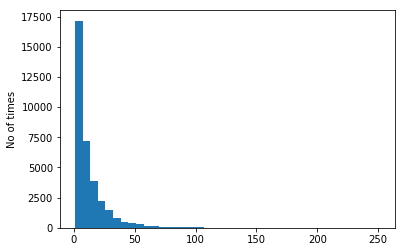

In [11]:
temp = top_five_data['line_text']
print("total ", len(temp))
word_count = []
short = 0
for line in temp:
    word_count.append(len(line.split(" ")))
    if 10 < len(line.split(" ")) < 30:
        short +=1
print(max(word_count), min(word_count))
print(short)
plt.hist(word_count, bins=40)
mode = stats.mode(word_count)
print(mode.mode[0], mode.count[0])
plt.ylabel('No of times')
plt.show()

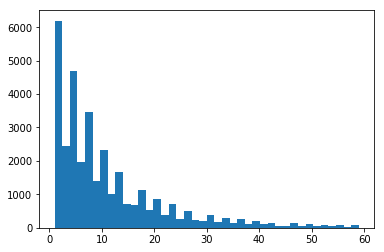

In [12]:
top_five_data['word count'] = word_count
top_five_data_small = top_five_data.loc[top_five_data['word count'] < 60]
plt.hist(top_five_data_small['word count'], bins=40)
plt.show()

In [18]:
# top_five_data_small.to_csv(path_or_buf="./cleandata.csv", index=False)

In [ ]:
data = top_five_data_small

In [ ]:
# MOVE TO CLEAN
data['line_text'] = data['line_text'].str.replace("[\(\[].*?[\)\]]", "")
data['line_text'] = data['line_text'].str.replace('([.,!?()])', r' \1 ')
data['line_text'] = data['line_text'].str.replace('\s{2,}', ' ')
data['line_text'] = data['line_text'].str.lower()

In [ ]:
data.to_csv(path_or_buf="./cleandata.csv", index=False)